## <font color = plum> Assignment #2 

#### <font color = lightblue> Question 1

C:\Users\Rayad\AppData\Local\Temp\ipykernel_2560\2245552956.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(horizontal,vertical, 'b', marker = '*', linestyle = '--', color = 'royalblue')


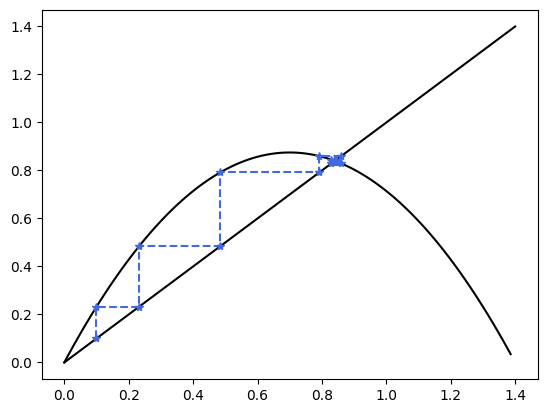

In [1]:
from pylab import *

r = 2.5
k = 1.4
N0 = .1

def initialize ():
    global x, result
    x = N0
    result = [x]
    
def observe():
    global x, result
    result.append(x)
    
def f(x):
    return r * x * (1 - x/k)

def update():
    global x, result
    x = f(x)

initialize()
    
for t in arange(30):
    update()
    observe()
    
xmin, xmax = 0, k 
plot([xmin, xmax], [xmin, xmax], 'k')

rng = arange(xmin, xmax, (xmax - xmin) / 100)

plot(rng, list(map(f,rng)), 'k')

###drawingtrajectory
horizontal = [result[0]]
vertical = [result[0]]
for x in result[1:]:
    horizontal.append(vertical[-1])
    vertical.append(x)
    horizontal.append(x)
    vertical.append(x)
plt.plot(horizontal,vertical, 'b', marker = '*', linestyle = '--', color = 'royalblue')

show()

#### <font color = lightblue> Question 2 

In [2]:
#pip install --upgrade pip

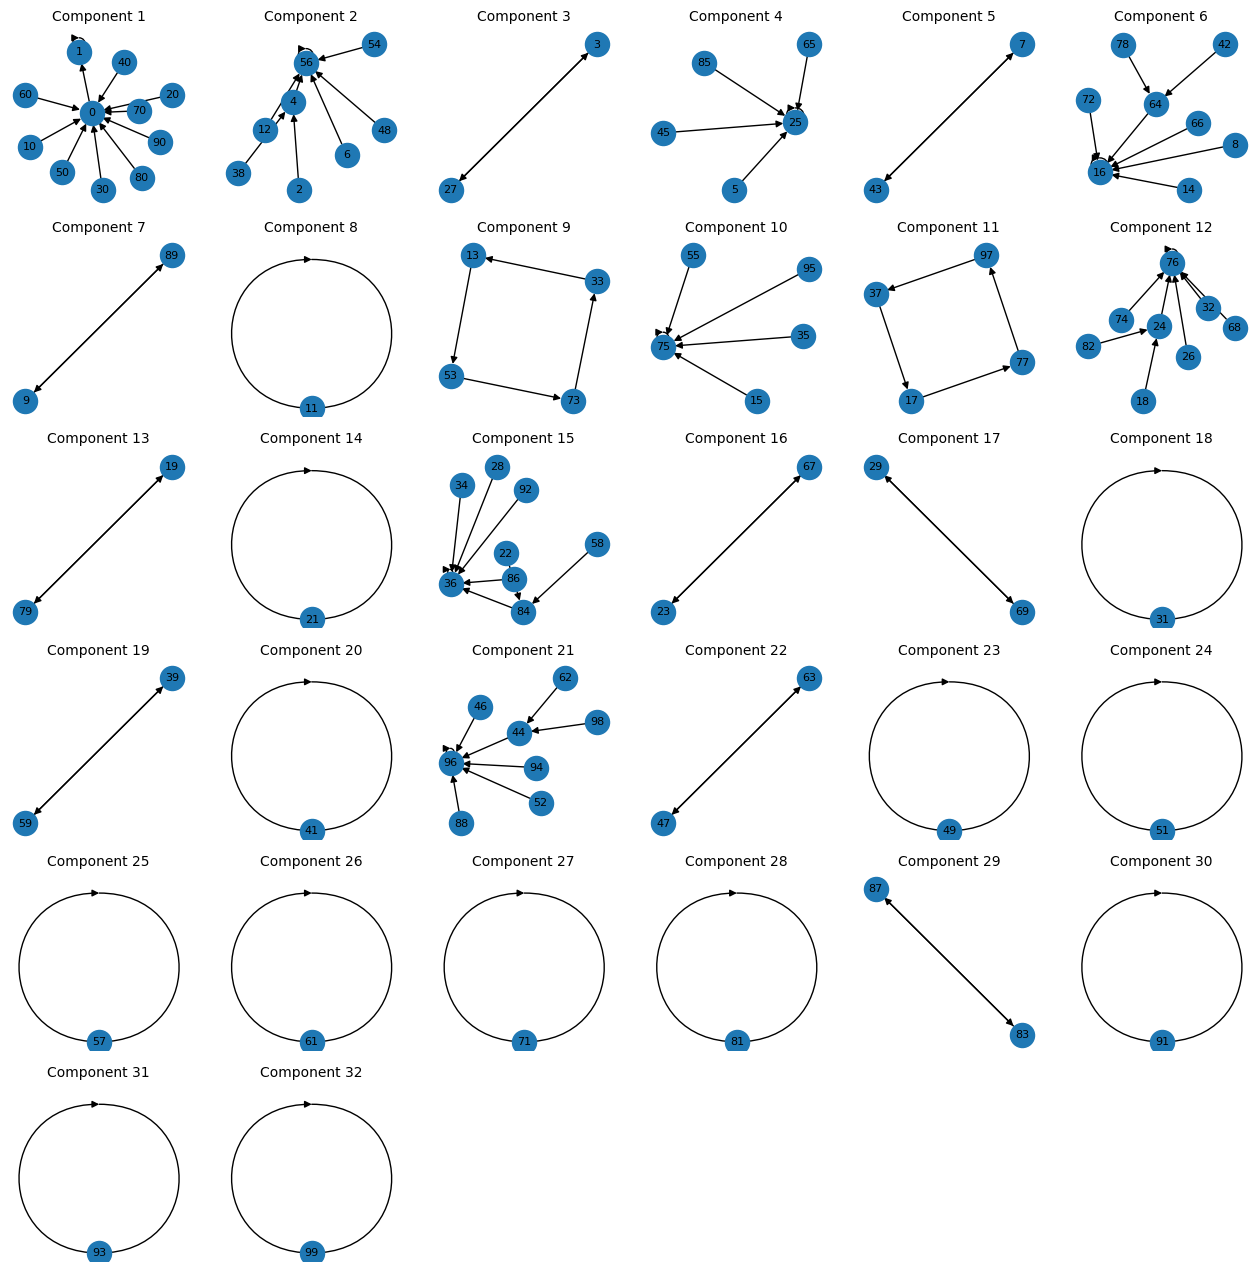

In [24]:
import matplotlib.pyplot as plt
import networkx as nx
from math import ceil, sqrt
from numpy import arange

g = nx.DiGraph()

for x in range(100):
    for y in range (100):
        xnext = (x ** x) % 100
        g.add_edge(x, xnext)
        
ccs = [cc for cc in nx.weakly_connected_components(g)]

n = len(ccs)
w = ceil(sqrt(n))
h = ceil(n / w)

plt.figure(figsize=(16,16))
for i in arange(n):
    plt.subplot(int(h), int(w), i + 1)
    nx.draw(nx.subgraph(g, ccs[i]), with_labels=True, node_size = 300, font_size = 8 )
    plt.title('Component {}'.format(i + 1), size = 10)
    
plt.show()